In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [9]:
df = pd.read_csv(r"C:\Users\Shan Jacob\Downloads\term-deposit-marketing-2020.csv")

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [11]:
len(df)

40000

In [12]:
df1=df.copy()

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

df.info()

In [14]:
df1 = df1.drop('month', axis=1)

In [17]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,no


In [16]:
df1 = df1.drop('day', axis=1)

In [18]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [19]:
def classify_occupation(occupation):
    professional = ['management', 'technician', 'admin', 'services','blue-collar']
    non_professional = ['housemaid', 'student','unemployed']
    unknown= ['unknown']
    
    if occupation in professional:
        return 'Professional'
    elif occupation in non_professional:
        return 'Non-Professional'
    elif occupation in unknown:
        return 'unknown'
    else:
        return 'Other'
df1['occupation_class'] = df1['job'].apply(classify_occupation)
df1 = df1.drop(columns=['job'])

In [22]:
df1.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,y,occupation_class
0,58,married,tertiary,no,2143,yes,no,unknown,261,1,no,Professional
1,44,single,secondary,no,29,yes,no,unknown,151,1,no,Professional
2,33,married,secondary,no,2,yes,yes,unknown,76,1,no,Other
3,47,married,unknown,no,1506,yes,no,unknown,92,1,no,Professional
4,33,single,unknown,no,1,no,no,unknown,198,1,no,unknown


In [23]:
bool_columns = ['housing', 'loan', 'y','default']
for col in  bool_columns:
    df1[col+'_new']=df1[col].apply(lambda x : 1 if x == 'yes' else 0)
    df1.drop(col, axis=1, inplace=True)

In [24]:
df1.head()

,age,marital,education,balance,contact,duration,campaign,occupation_class,housing_new,loan_new,y_new,default_new
0,58,married,tertiary,2143,unknown,261,1,Professional,1,0,0,0
1,44,single,secondary,29,unknown,151,1,Professional,1,0,0,0
2,33,married,secondary,2,unknown,76,1,Other,1,1,0,0
3,47,married,unknown,1506,unknown,92,1,Professional,1,0,0,0
4,33,single,unknown,1,unknown,198,1,unknown,0,0,0,0


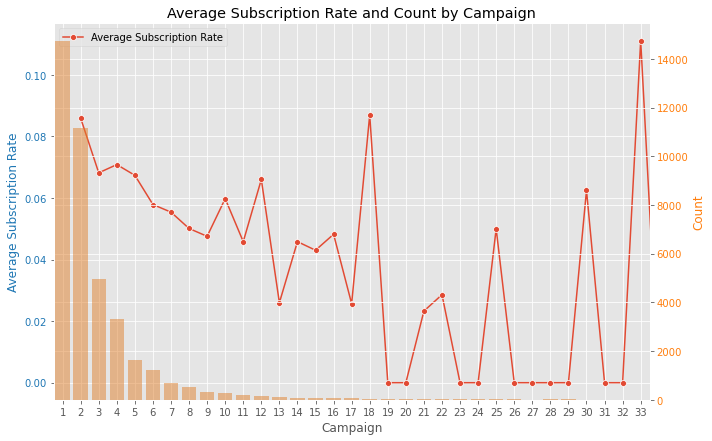

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


average_subscription_data = df1.groupby('campaign')['y_new'].mean().reset_index(name='average_subscription')


count_data = df1.groupby('campaign')['y_new'].count().reset_index(name='count')


fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(x='campaign', y='average_subscription', data=average_subscription_data, ax=ax1, label='Average Subscription Rate', marker='o')

ax1.set_xlabel('Campaign')
ax1.set_ylabel('Average Subscription Rate', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()

sns.barplot(x='campaign', y='count', data=count_data, ax=ax2, color='tab:orange', alpha=0.5, label='Count')

ax2.set_ylabel('Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.title('Average Subscription Rate and Count by Campaign')
plt.show()


In [32]:
df1 = df1[df1['campaign'] < 34]

In [34]:
import pandas as pd


bins = [0, 18, 25, 35, 45, 55, float('inf')] 

labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56+']


df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)


print(df1)

       age   marital  education  balance   contact  duration  campaign  \
0       58   married   tertiary     2143   unknown       261         1   
1       44    single  secondary       29   unknown       151         1   
2       33   married  secondary        2   unknown        76         1   
3       47   married    unknown     1506   unknown        92         1   
4       33    single    unknown        1   unknown       198         1   
...    ...       ...        ...      ...       ...       ...       ...   
39995   53   married   tertiary      395  cellular       107         1   
39996   30    single   tertiary     3340  cellular       238         3   
39997   54  divorced  secondary      200  cellular       170         1   
39998   34   married   tertiary     1047  cellular       342         1   
39999   38   married  secondary     1442  cellular       113         1   

      occupation_class  housing_new  loan_new  y_new  default_new age_group  
0         Professional           

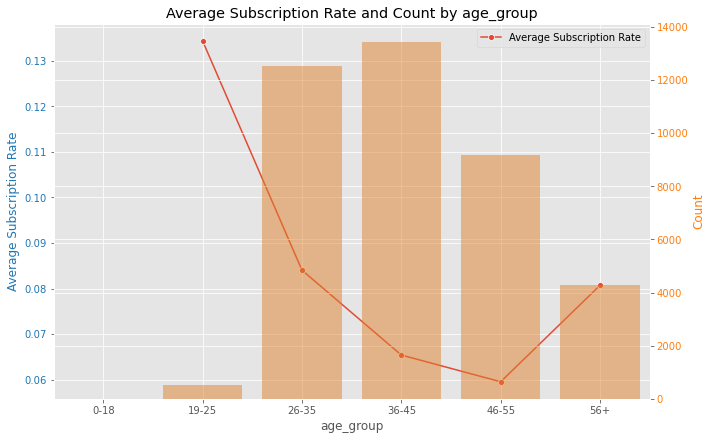

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables you want to plot
variables_to_plot = ['age_group']

# Loop through each variable
for variable in variables_to_plot:
    # Group by the current variable and calculate mean and count
    average_data = df1.groupby(variable)['y_new'].mean().reset_index(name='average_subscription')
    count_data = df1.groupby(variable)['y_new'].count().reset_index(name='count')

    # Create subplots
    fig, ax1 = plt.subplots(figsize=(10, 6))
    sns.lineplot(x=variable, y='average_subscription', data=average_data, ax=ax1, label='Average Subscription Rate', marker='o')

    ax1.set_xlabel(variable)
    ax1.set_ylabel('Average Subscription Rate', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    sns.barplot(x=variable, y='count', data=count_data, ax=ax2, color='tab:orange', alpha=0.5, label='Count')

    ax2.set_ylabel('Count', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    fig.tight_layout()
    plt.title(f'Average Subscription Rate and Count by {variable}')
    plt.show()


In [40]:
df1 = df1.drop('age', axis=1)

In [44]:
bins = [0, 1000, 10000, 100000, 1000000, 10000000,float('inf')] 

labels = ['Below 0', '0-1000', '1000-10000', '10000-100000', '100000-1000000', '10000000+']


df1['balance_group'] = pd.cut(df1['balance'], bins=bins, labels=labels, right=False)


print(df1)

        marital  education  balance   contact  duration  campaign  \
0       married   tertiary     2143   unknown       261         1   
1        single  secondary       29   unknown       151         1   
2       married  secondary        2   unknown        76         1   
3       married    unknown     1506   unknown        92         1   
4        single    unknown        1   unknown       198         1   
...         ...        ...      ...       ...       ...       ...   
39995   married   tertiary      395  cellular       107         1   
39996    single   tertiary     3340  cellular       238         3   
39997  divorced  secondary      200  cellular       170         1   
39998   married   tertiary     1047  cellular       342         1   
39999   married  secondary     1442  cellular       113         1   

      occupation_class  housing_new  loan_new  y_new  default_new age_group  \
0         Professional            1         0      0            0       56+   
1         Pro

In [64]:
bins = [0, 1000, 10000, 100000, 1000000, 10000000, float('inf')]
labels =['Below 1000', '1000-10000', '10000-100000', '100000-1000000', '1000000-10000000', '10000000+']


# Apply pd.cut to create a new column 'balance_group'
df1['balance_group'] = pd.cut(df1['balance'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the 'balance_group' column
print(df1)

        marital  education  balance   contact  duration  campaign  \
0       married   tertiary     2143   unknown       261         1   
1        single  secondary       29   unknown       151         1   
2       married  secondary        2   unknown        76         1   
3       married    unknown     1506   unknown        92         1   
4        single    unknown        1   unknown       198         1   
...         ...        ...      ...       ...       ...       ...   
39995   married   tertiary      395  cellular       107         1   
39996    single   tertiary     3340  cellular       238         3   
39997  divorced  secondary      200  cellular       170         1   
39998   married   tertiary     1047  cellular       342         1   
39999   married  secondary     1442  cellular       113         1   

      occupation_class  housing_new  loan_new  y_new  default_new age_group  \
0         Professional            1         0      0            0       56+   
1         Pro

In [55]:
print(df1[['balance','balance_group']])

       balance balance_group
0         2143    1000-10000
1           29    Below 1000
2            2    Below 1000
3         1506    1000-10000
4            1    Below 1000
...        ...           ...
39995      395    Below 1000
39996     3340    1000-10000
39997      200    Below 1000
39998     1047    1000-10000
39999     1442    1000-10000

[39968 rows x 2 columns]


In [53]:
df1 = df1.drop('balance_group1', axis=1)

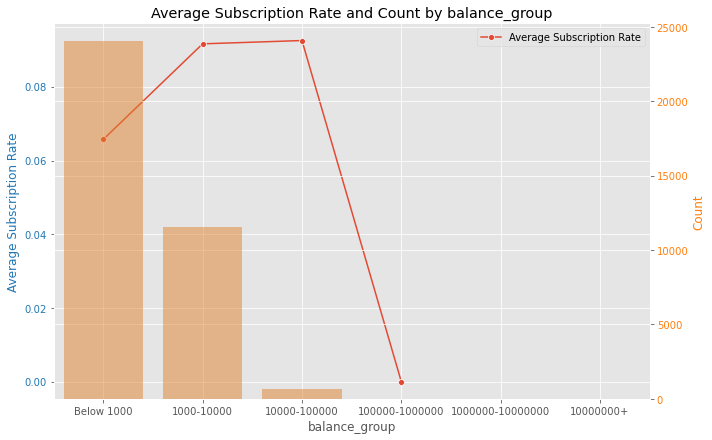

In [57]:
variables_to_plot = ['balance_group']

# Loop through each variable
for variable in variables_to_plot:
    # Group by the current variable and calculate mean and count
    average_data = df1.groupby(variable)['y_new'].mean().reset_index(name='average_subscription')
    count_data = df1.groupby(variable)['y_new'].count().reset_index(name='count')

    # Create subplots
    fig, ax1 = plt.subplots(figsize=(10, 6))
    sns.lineplot(x=variable, y='average_subscription', data=average_data, ax=ax1, label='Average Subscription Rate', marker='o')

    ax1.set_xlabel(variable)
    ax1.set_ylabel('Average Subscription Rate', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    sns.barplot(x=variable, y='count', data=count_data, ax=ax2, color='tab:orange', alpha=0.5, label='Count')

    ax2.set_ylabel('Count', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    fig.tight_layout()
    plt.title(f'Average Subscription Rate and Count by {variable}')
    plt.show()

In [61]:
df1['balance'].describe()

count     39968.000000
mean       1274.650946
std        2904.447980
min       -8019.000000
25%          54.000000
50%         407.500000
75%        1319.000000
max      102127.000000
Name: balance, dtype: float64

In [62]:
df1['duration'].describe()

count    39968.000000
mean       254.966899
std        259.368105
min          0.000000
25%        100.000000
50%        175.000000
75%        313.000000
max       4918.000000
Name: duration, dtype: float64

In [73]:
bins = [0, 100, 500, 1000, 3000,4000, float('inf')]
labels =['Below 100', '100-500', '500-1000', '1000-3000', '3000-4000', '4000+']


# Apply pd.cut to create a new column 'balance_group'
df1['duration_group'] = pd.cut(df1['duration'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the 'balance_group' column
print(df1)

        marital  education  balance   contact  duration  campaign  \
0       married   tertiary     2143   unknown       261         1   
1        single  secondary       29   unknown       151         1   
2       married  secondary        2   unknown        76         1   
3       married    unknown     1506   unknown        92         1   
4        single    unknown        1   unknown       198         1   
...         ...        ...      ...       ...       ...       ...   
39995   married   tertiary      395  cellular       107         1   
39996    single   tertiary     3340  cellular       238         3   
39997  divorced  secondary      200  cellular       170         1   
39998   married   tertiary     1047  cellular       342         1   
39999   married  secondary     1442  cellular       113         1   

      occupation_class  housing_new  loan_new  y_new  default_new age_group  \
0         Professional            1         0      0            0       56+   
1         Pro

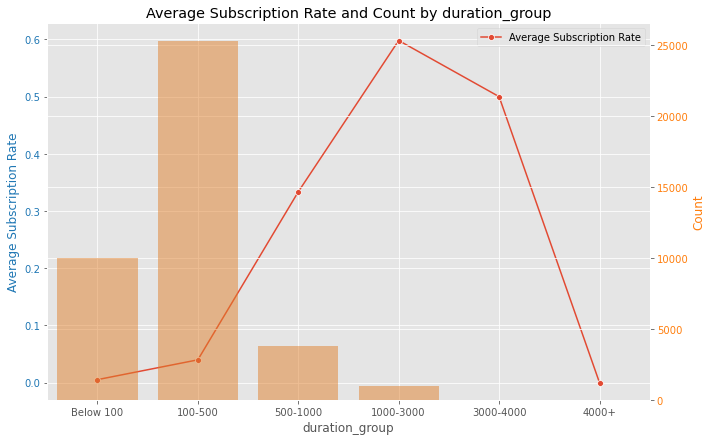

In [74]:
variables_to_plot = ['duration_group']

# Loop through each variable
for variable in variables_to_plot:
    # Group by the current variable and calculate mean and count
    average_data = df1.groupby(variable)['y_new'].mean().reset_index(name='average_subscription')
    count_data = df1.groupby(variable)['y_new'].count().reset_index(name='count')

    # Create subplots
    fig, ax1 = plt.subplots(figsize=(10, 6))
    sns.lineplot(x=variable, y='average_subscription', data=average_data, ax=ax1, label='Average Subscription Rate', marker='o')

    ax1.set_xlabel(variable)
    ax1.set_ylabel('Average Subscription Rate', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    sns.barplot(x=variable, y='count', data=count_data, ax=ax2, color='tab:orange', alpha=0.5, label='Count')

    ax2.set_ylabel('Count', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    fig.tight_layout()
    plt.title(f'Average Subscription Rate and Count by {variable}')
    plt.show()

In [75]:
columns_to_drop = ['balance', 'duration']
df2 = df1.drop(columns=columns_to_drop)

In [76]:
df2.head()

,marital,education,contact,campaign,occupation_class,housing_new,loan_new,y_new,default_new,age_group,balance_group,duration_group
0,married,tertiary,unknown,1,Professional,1,0,0,0,56+,1000-10000,100-500
1,single,secondary,unknown,1,Professional,1,0,0,0,36-45,Below 1000,100-500
2,married,secondary,unknown,1,Other,1,1,0,0,26-35,Below 1000,Below 100
3,married,unknown,unknown,1,Professional,1,0,0,0,46-55,1000-10000,Below 100
4,single,unknown,unknown,1,unknown,0,0,0,0,26-35,Below 1000,100-500


In [77]:
X = df2.drop('y_new',axis=1)
Y = df2['y_new']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
len(X_test)

7994

In [82]:
cat_columns = ['occupation_class', 'marital', 'education', 'contact','age_group','balance_group','duration_group']
X_train1 = pd.get_dummies(X_train, columns=cat_columns)

In [84]:
cat_columns = ['occupation_class', 'marital', 'education', 'contact','age_group','balance_group','duration_group']
X_test1 = pd.get_dummies(X_test, columns=cat_columns)

In [87]:
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train1, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
y_pred =model.predict(X_test1)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9294470853139855


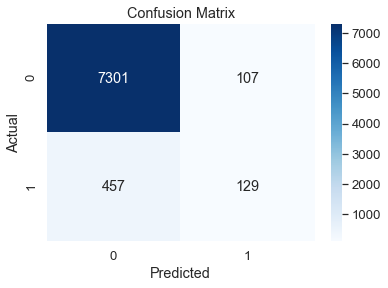

In [90]:
from sklearn.metrics import confusion_matrix


# Assuming y_pred and y_test are defined
conf_mat = confusion_matrix(y_test, y_pred)

# Create a figure and a set of subplots
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

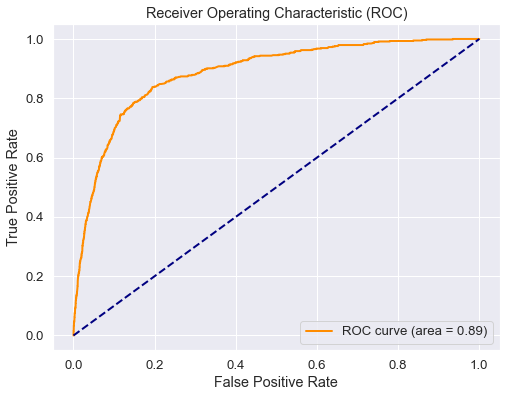

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_probabilities = model.predict_proba(X_test1)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [92]:
from sklearn.metrics import classification_report


# Calculate the classification report
report = classification_report(y_test,y_pred)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7408
           1       0.55      0.22      0.31       586

    accuracy                           0.93      7994
   macro avg       0.74      0.60      0.64      7994
weighted avg       0.91      0.93      0.92      7994



In [94]:
column_names = list(X_test1.columns)
print(column_names)

['campaign', 'housing_new', 'loan_new', 'default_new', 'occupation_class_Non-Professional', 'occupation_class_Other', 'occupation_class_Professional', 'occupation_class_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'age_group_0-18', 'age_group_19-25', 'age_group_26-35', 'age_group_36-45', 'age_group_46-55', 'age_group_56+', 'balance_group_Below 1000', 'balance_group_1000-10000', 'balance_group_10000-100000', 'balance_group_100000-1000000', 'balance_group_1000000-10000000', 'balance_group_10000000+', 'duration_group_Below 100', 'duration_group_100-500', 'duration_group_500-1000', 'duration_group_1000-3000', 'duration_group_3000-4000', 'duration_group_4000+']


In [96]:
feature_importance = model.feature_importances_

In [97]:
feature_importance_table = pd.DataFrame({
    'Feature': column_names,
    'Importance': feature_importance
})

# Sort the table by importance in descending order
feature_importance_table = feature_importance_table.sort_values(by='Importance', ascending=False)

# Print the table
print(feature_importance_table)

                              Feature  Importance
33           duration_group_1000-3000    0.330236
32            duration_group_500-1000    0.272508
30           duration_group_Below 100    0.098474
17                    contact_unknown    0.039011
31             duration_group_100-500    0.030440
1                         housing_new    0.015698
15                   contact_cellular    0.015147
2                            loan_new    0.013670
25           balance_group_1000-10000    0.012988
19                    age_group_19-25    0.011286
9                     marital_married    0.009665
22                    age_group_46-55    0.009414
13                 education_tertiary    0.009116
10                     marital_single    0.009086
21                    age_group_36-45    0.008993
6       occupation_class_Professional    0.008685
16                  contact_telephone    0.008648
8                    marital_divorced    0.008516
5              occupation_class_Other    0.008292


In [98]:
tp = conf_mat[1, 1]
fp = conf_mat[0, 1]
fn = conf_mat[1, 0]
tn = conf_mat[0, 0]

# Calculate precision
precision = tp / (tp + fp)

# Calculate recall (or sensitivity)
recall = tp / (tp + fn)

# Calculate specificity
specificity = tn / (tn + fp)

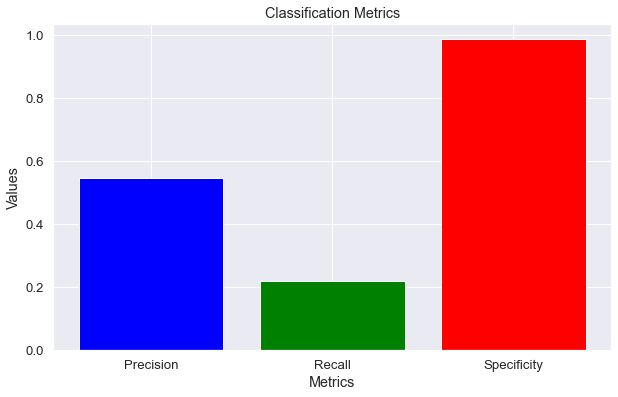

In [99]:
labels = ['Precision', 'Recall', 'Specificity']
values = [precision, recall, specificity]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Classification Metrics')

# Show the plot
plt.show()

In [100]:
yp=y_pred.tolist()

In [101]:
X_ts=X_test

In [104]:
X_ts['yp'] = yp

<ipython-input-104-cc175ddfdb2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ts['yp'] = yp


In [108]:
X_ts
X_ts['y'] = y_test

In [109]:
X_ts

,marital,education,contact,campaign,occupation_class,housing_new,loan_new,default_new,age_group,balance_group,duration_group,yp,y
33617,married,primary,cellular,2,Professional,0,0,0,46-55,1000-10000,100-500,0,0
729,divorced,primary,unknown,2,Professional,1,0,0,46-55,Below 1000,100-500,0,0
20081,divorced,tertiary,cellular,5,Professional,0,0,0,36-45,Below 1000,Below 100,0,0
29870,single,primary,cellular,1,Professional,1,0,0,36-45,Below 1000,500-1000,1,0
38449,divorced,secondary,cellular,1,Other,1,0,0,56+,NaN,500-1000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28649,single,tertiary,cellular,2,Non-Professional,0,0,0,26-35,Below 1000,100-500,0,0
25081,married,secondary,cellular,1,Professional,1,0,0,26-35,1000-10000,100-500,0,0
15294,married,unknown,cellular,6,Professional,1,0,0,36-45,Below 1000,100-500,0,0
6833,single,tertiary,unknown,2,Professional,0,0,0,26-35,1000-10000,100-500,0,0


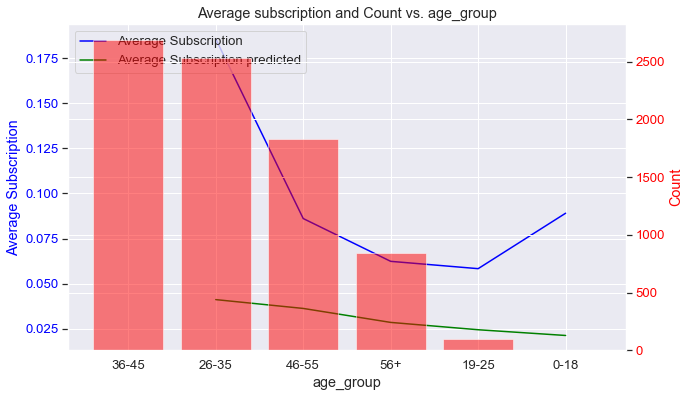

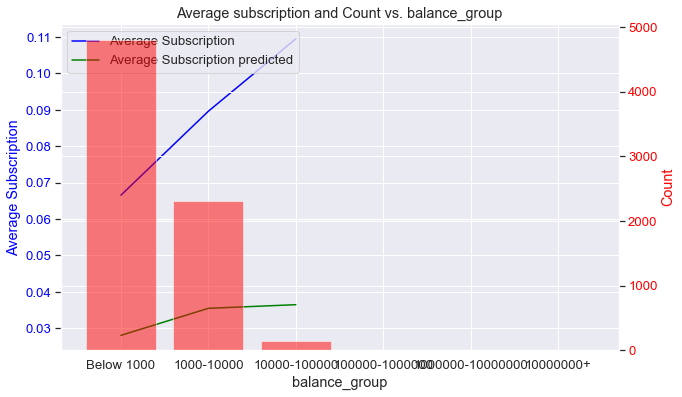

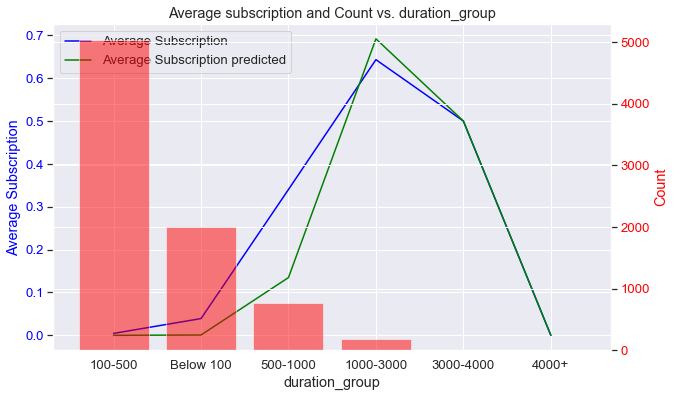

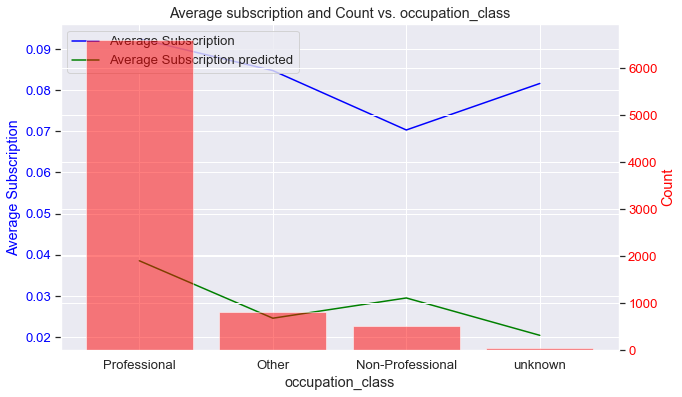

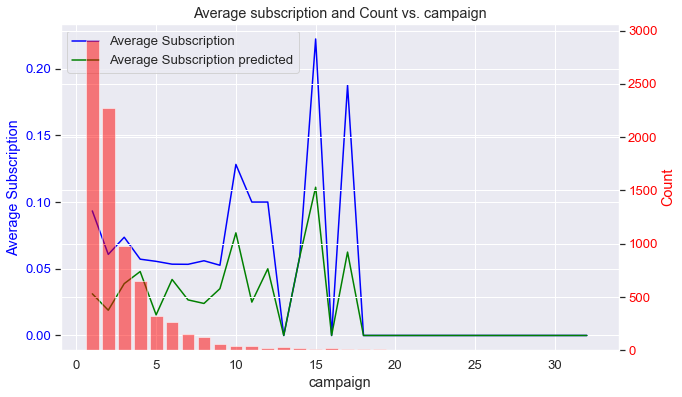

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a list of features for which you want to create plots
features_to_plot = ['age_group', 'balance_group', 'duration_group','occupation_class','campaign']

def plot_subscription_by_feature(feature):
    # Assuming X_ts is a DataFrame with 'Subscription' and 'Subscription_predicted' columns
    average_h_by_s = X_ts.groupby(feature)['y'].mean()
    average_hp_by_s = X_ts.groupby(feature)['yp'].mean()
    count_by_gp = X_ts[feature].value_counts()

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the average subscription
    color = 'blue'
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Average Subscription', color=color)
    line1, = ax1.plot(average_h_by_s.index, average_h_by_s.values, color=color, label='Average Subscription')
    line2, = ax1.plot(average_hp_by_s.index, average_hp_by_s.values, color='green', label='Average Subscription predicted')
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a secondary y-axis for the count
    ax2 = ax1.twinx()
    color = 'red'
    ax2.set_ylabel('Count', color=color)
    ax2.bar(count_by_gp.index, count_by_gp.values, color=color, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=color)

    lines = [line1, line2]
    ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

    # Set the title
    plt.title(f'Average subscription and Count vs. {feature}')

    # Show the plot
    plt.show()

# Iterate over features and create plots
for feature in features_to_plot:
    plot_subscription_by_feature(feature)
